# Model Comparison: Chronos 2 (Multivariate) vs Large Bayesian VAR

This notebook compares the forecasting performance of Chronos 2 (Amazon) against a Large Bayesian VAR.

**Key Update:** We now use **Multivariate Forecasting**, where Chronos predicts all 7 variables simultaneously, allowing it to leverage correlations (covariates) between series, similar to a VAR.

## 1. Setup and Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from autogluon.timeseries import TimeSeriesDataFrame, TimeSeriesPredictor

In [2]:

# File paths
BVAR_DATA_DIR = "../papers/A Large Bayesian VAR of the US Economy- Giannone Replication Files and Paper/GLPreplicationWeb/"
HIST_DATA_PATH = BVAR_DATA_DIR + "historical_data.csv"
BVAR_FCST_PATH = BVAR_DATA_DIR + "bvar_forecast.csv"

# Variable Metadata
target_vars = ['RGDP', 'PGDP', 'Cons', 'GPDInv', 'EmpHours', 'RealCompHour', 'FedFunds']

# Load Historical Data
try:
    df_hist = pd.read_csv(HIST_DATA_PATH)
    print("Historical Data Loaded. Shape:", df_hist.shape)
    # Ensure correct order of columns matching target_vars
    df_hist_targets = df_hist[target_vars]
    display(df_hist_targets.tail())
except FileNotFoundError:
    print(f"Error: Could not find {HIST_DATA_PATH}.")

# Load BVAR Forecast
try:
    df_bvar = pd.read_csv(BVAR_FCST_PATH)
    print("\nBVAR Forecast Loaded.")
    display(df_bvar.head())
except FileNotFoundError:
    print(f"Error: Could not find {BVAR_FCST_PATH}.")

Historical Data Loaded. Shape: (200, 8)


,RGDP,PGDP,Cons,GPDInv,EmpHours,RealCompHour,FedFunds
195,19.095396,19.177406,19.252963,18.524872,19.215396,19.180451,0.044967
196,19.104071,19.203375,19.261562,18.464836,19.198505,19.174889,0.031767
197,19.131926,19.214477,19.273700,18.342767,19.180881,19.142560,0.020867
198,19.126834,19.253093,19.234794,18.346762,19.140589,19.133265,0.019400
199,19.061291,19.258547,19.190923,18.085458,19.053684,19.280900,0.005067



BVAR Forecast Loaded.


,Horizon_Quarters,RGDP_Fcst,PGDP_Fcst,Cons_Fcst,GPDInv_Fcst,EmpHours_Fcst,RealCompHour_Fcst,FedFunds_Fcst
0,1,-1.271516,1.304980,2.768383,-22.610311,-5.089148,2.773195,-1.035201
1,2,-0.190274,1.513461,2.330457,-12.136884,-4.118026,2.382956,-0.821785
2,3,0.702698,1.503057,2.474627,-7.224618,-3.339150,2.224402,-0.702437
3,4,1.307950,1.380612,2.704034,-4.136635,-2.651326,2.214813,-0.557524
4,5,1.766104,1.334331,2.870021,-1.610157,-2.004445,2.191320,-0.461514


## 2. Chronos 2 Inference via AutoGluon

We use AutoGluon's `TimeSeriesPredictor` with the `presets="chronos2"` option for efficient model loading and inference.
AutoGluon handles model caching and optimization, avoiding repeated downloads.

Data is prepared in long format with columns: `[item_id, timestamp, target]`.

Beginning AutoGluon training...
AutoGluon will save models to '/Users/macbox/Library/Mobile Documents/3L68KQB4HG~com~readdle~CommonDocuments/Documents/Boston College PhD/Research Ideas/Bayesian VARs and TSLMs/Replication/AutogluonModels/ag-20260121_021855'


TimeSeriesDataFrame prepared:
                        target
item_id  timestamp            
RGDP     1974-03-31  12.774232
         1974-06-30  12.878062
         1974-09-30  12.875023
         1974-12-31  12.889080
         1975-03-31  12.977083
...                        ...
FedFunds 2022-12-31   0.044967
         2023-03-31   0.031767
         2023-06-30   0.020867
         2023-09-30   0.019400
         2023-12-31   0.005067

[1400 rows x 1 columns]

Unique IDs: Index(['RGDP', 'PGDP', 'Cons', 'GPDInv', 'EmpHours', 'RealCompHour',
       'FedFunds'],
      dtype='object', name='item_id')

Fitting TimeSeriesPredictor with Chronos2 preset...


=================== System Info ===================
AutoGluon Version:  1.5.0
Python Version:     3.11.14
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 25.1.0: Mon Oct 20 19:32:56 PDT 2025; root:xnu-12377.41.6~2/RELEASE_ARM64_T8132
CPU Count:          10
Pytorch Version:    2.9.1
CUDA Version:       CUDA is not available
GPU Count:          WARNING: Exception was raised when calculating GPU count (AssertionError)
Memory Avail:       6.12 GB / 24.00 GB (25.5%)
Disk Space Avail:   14.12 GB / 460.43 GB (3.1%)
Setting presets to: chronos2

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': MASE,
 'hyperparameters': {'Chronos2': {'model_path': 'autogluon/chronos-2'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 8,
 'quantile_levels': [0.1, 0.5, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferr

Predictor fitted successfully.

Generating forecasts for 8 steps...
Forecast generated. Sample:
                         mean        0.1        0.5        0.9
item_id timestamp                                             
RGDP    2024-03-31  19.070360  18.992928  19.070360  19.115896
        2024-06-30  19.078018  18.971249  19.078018  19.139303
        2024-09-30  19.086517  18.964708  19.086517  19.162098
        2024-12-31  19.088535  18.975266  19.088535  19.190083
        2025-03-31  19.109369  18.951973  19.109369  19.229115
        2025-06-30  19.116180  18.946243  19.116180  19.262922
        2025-09-30  19.140429  18.965317  19.140429  19.291800
        2025-12-31  19.163919  18.951656  19.163919  19.331701
PGDP    2024-03-31  19.289654  19.234879  19.289654  19.323200
        2024-06-30  19.308878  19.235785  19.308878  19.360485
        2024-09-30  19.329899  19.251766  19.329899  19.384333
        2024-12-31  19.334549  19.269497  19.334549  19.411390
        2025-03-31  19

Text(0.5, 1.0, 'RGDP (Multivariate)')

Text(0.5, 0, 'Horizon (Quarters)')

Text(0, 0.5, 'Ann. Growth/Change (%)')

Text(0.5, 1.0, 'PGDP (Multivariate)')

Text(0.5, 0, 'Horizon (Quarters)')

Text(0, 0.5, 'Ann. Growth/Change (%)')

Text(0.5, 1.0, 'Cons (Multivariate)')

Text(0.5, 0, 'Horizon (Quarters)')

Text(0, 0.5, 'Ann. Growth/Change (%)')

Text(0.5, 1.0, 'GPDInv (Multivariate)')

Text(0.5, 0, 'Horizon (Quarters)')

Text(0, 0.5, 'Ann. Growth/Change (%)')

Text(0.5, 1.0, 'EmpHours (Multivariate)')

Text(0.5, 0, 'Horizon (Quarters)')

Text(0, 0.5, 'Ann. Growth/Change (%)')

Text(0.5, 1.0, 'RealCompHour (Multivariate)')

Text(0.5, 0, 'Horizon (Quarters)')

Text(0, 0.5, 'Ann. Growth/Change (%)')

Text(0.5, 1.0, 'FedFunds (Multivariate)')

Text(0.5, 0, 'Horizon (Quarters)')

Text(0, 0.5, 'Ann. Growth/Change (%)')

(np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0))

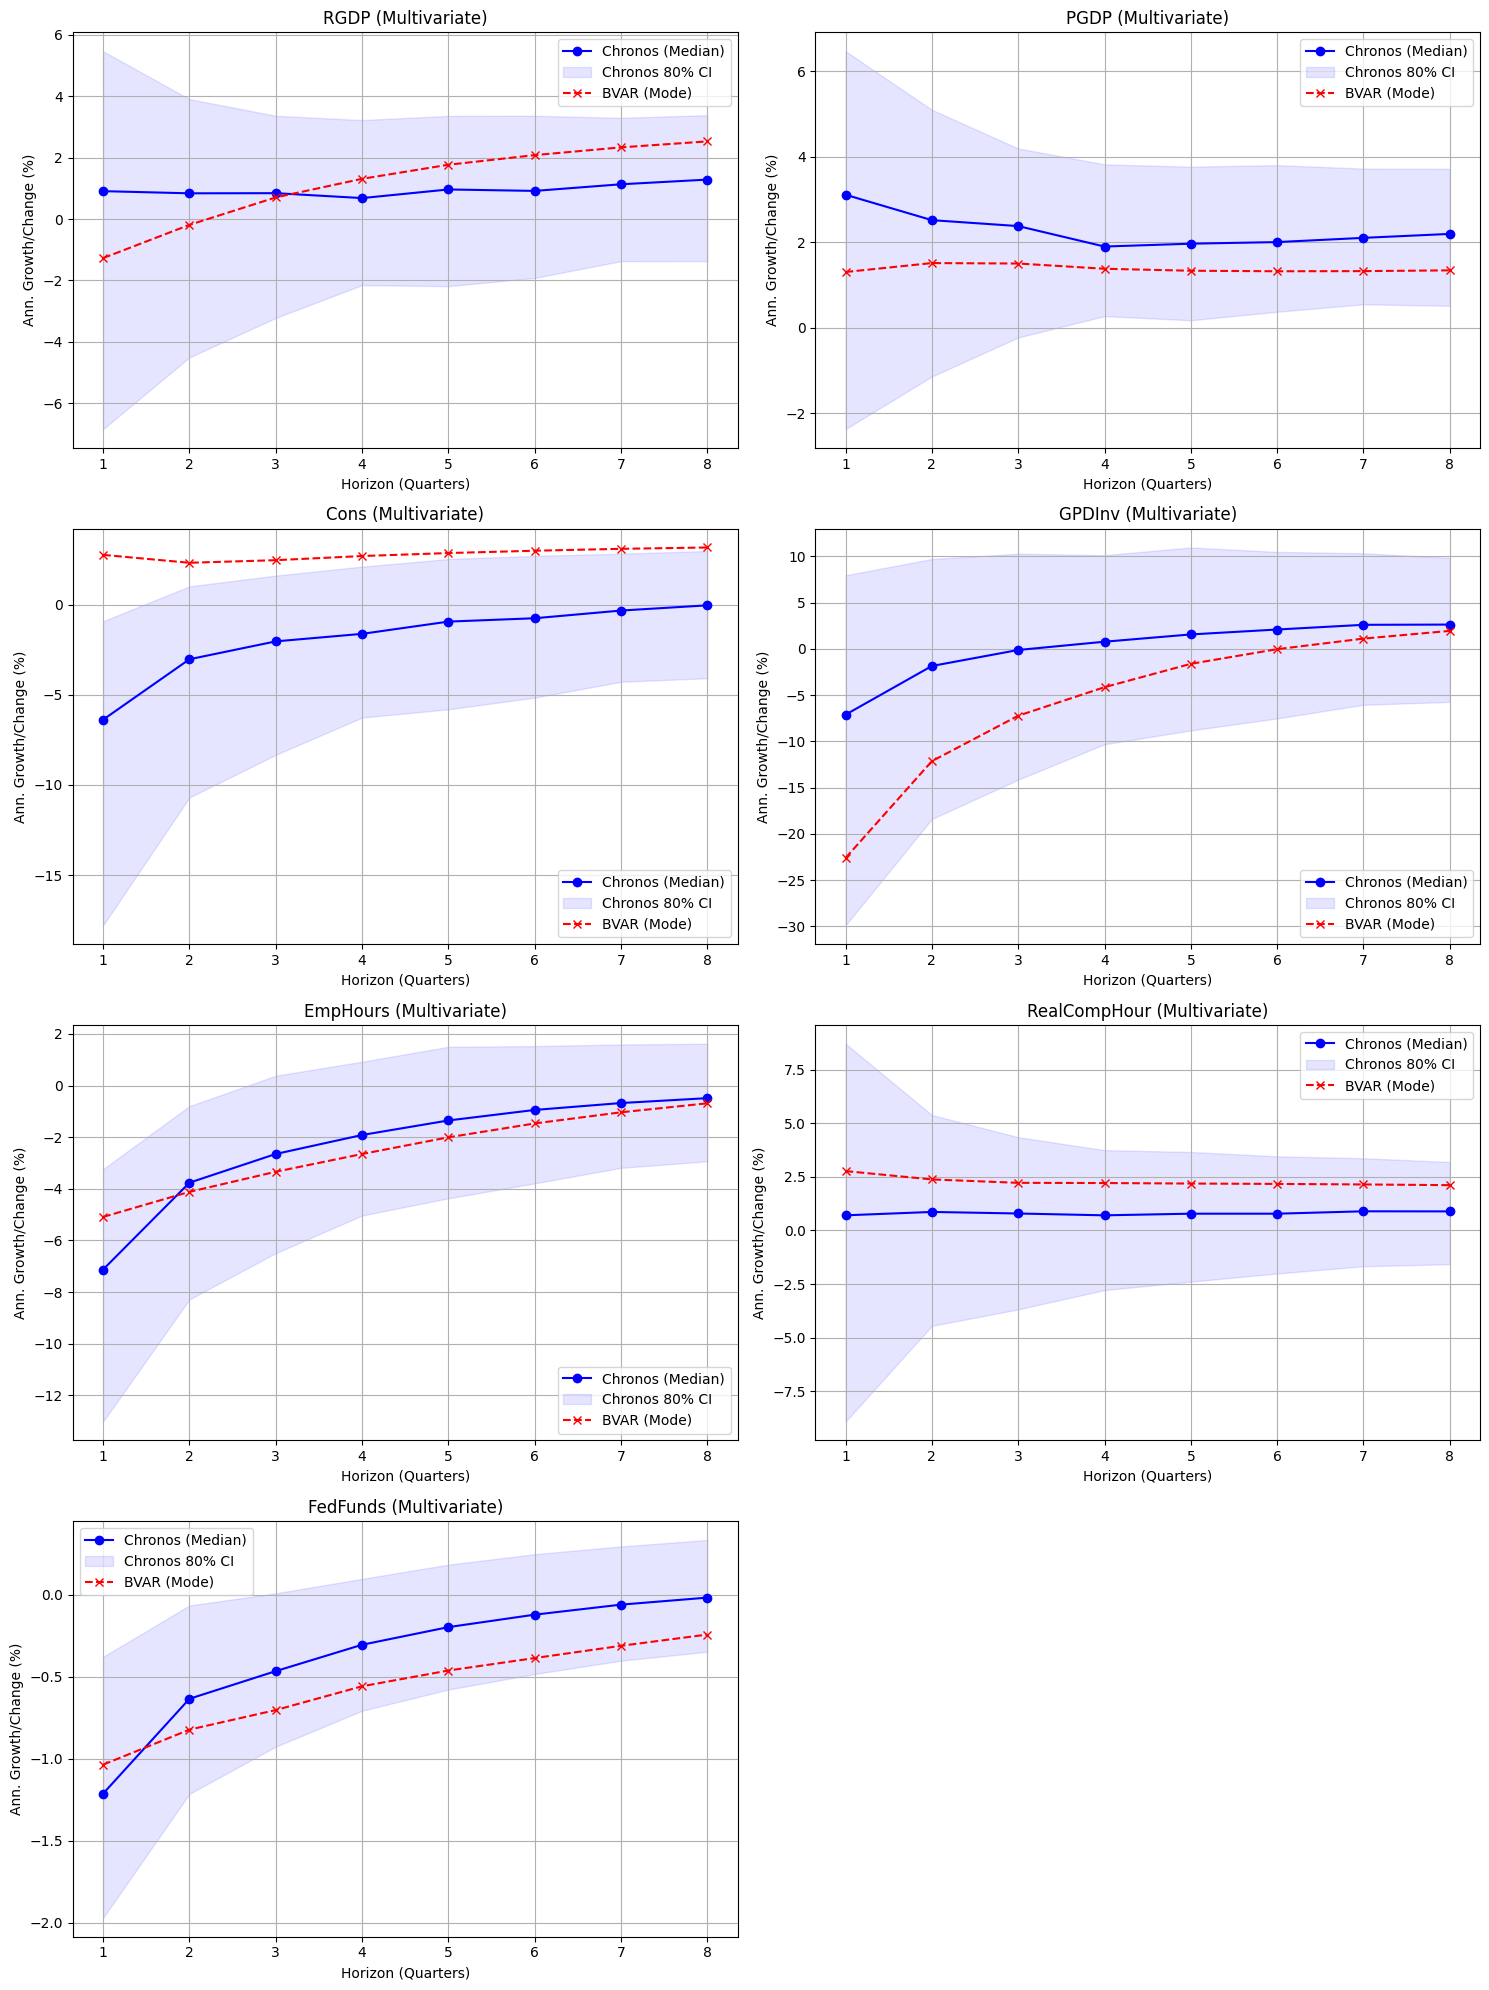

In [3]:
# Prepare Data for AutoGluon TimeSeriesDataFrame (Long Format)
# AutoGluon expects: [item_id, timestamp, target]

# 1. Create a proper timestamp index (Quarterly)
end_date = pd.Timestamp("2023-12-31")
date_range = pd.date_range(end=end_date, periods=len(df_hist_targets), freq="QE-DEC")

# 2. Construct Long-Format DataFrame
df_long = df_hist_targets.copy()
df_long["timestamp"] = date_range
df_long = df_long.melt(id_vars=["timestamp"], var_name="item_id", value_name="target")

# 3. Convert to TimeSeriesDataFrame
ts_data = TimeSeriesDataFrame.from_data_frame(
    df_long,
    id_column="item_id",
    timestamp_column="timestamp"
)

print("TimeSeriesDataFrame prepared:")
print(ts_data)
print(f"\nUnique IDs: {ts_data.item_ids}")

# 4. Initialize and fit TimeSeriesPredictor with Chronos2 preset
prediction_length = 8

print(f"\nFitting TimeSeriesPredictor with Chronos2 preset...")
predictor = TimeSeriesPredictor(
    prediction_length=prediction_length,
    eval_metric="MASE",
    verbosity=2,
    quantile_levels=[0.1, 0.5, 0.9],  # Specify quantiles at init
).fit(
    ts_data,
    presets="chronos2",  # Uses Chronos-2 model efficiently via AutoGluon
    time_limit=None,     # No time limit for fitting
)
print("Predictor fitted successfully.")

# 5. Generate Forecasts (quantile_levels already set at init)
print(f"\nGenerating forecasts for {prediction_length} steps...")
predictions = predictor.predict(ts_data)

print("Forecast generated. Sample:")
print(predictions.head(16))

# 6. Visualization & Comparison
results = {}
horizons = np.arange(1, prediction_length + 1)

# Convert predictions to results dictionary for plotting and comparison
for var_name in target_vars:
    # Filter for this variable
    var_pred = predictions.loc[var_name]
    
    # Get last observed value for transformation reference
    last_val = df_hist_targets[var_name].iloc[-1]
    
    # Extract quantiles (Levels)
    median_levels = var_pred["0.5"].values
    low_levels = var_pred["0.1"].values
    high_levels = var_pred["0.9"].values
    
    # Comparison is usually done on annualized growth/change
    # Transform: (Forecast_Level - Last_Level) / Horizon * 100
    chronos_median_growth = (median_levels - last_val) / horizons * 100
    chronos_low_growth = (low_levels - last_val) / horizons * 100
    chronos_high_growth = (high_levels - last_val) / horizons * 100
    
    results[var_name] = {
        'horizon': horizons,
        'median': chronos_median_growth,
        'low': chronos_low_growth,
        'high': chronos_high_growth
    }

# Visualization Plot
fig, axes = plt.subplots(4, 2, figsize=(15, 20))
axes = axes.flatten()

for i, var_name in enumerate(target_vars):
    ax = axes[i]
    res = results[var_name]
    
    # Chronos Plot
    ax.plot(res['horizon'], res['median'], label="Chronos (Median)", marker="o", color="blue")
    ax.fill_between(res['horizon'], res['low'], res['high'], color="blue", alpha=0.1, label="Chronos 80% CI")
    
    # BVAR Plot
    bvar_col = f"{var_name}_Fcst"
    if bvar_col in df_bvar.columns:
        ax.plot(res['horizon'], df_bvar[bvar_col], label="BVAR (Mode)", marker="x", color="red", linestyle="--")
        
    ax.set_title(f"{var_name} (Multivariate)")
    ax.set_xlabel("Horizon (Quarters)")
    ax.set_ylabel("Ann. Growth/Change (%)")
    ax.legend()
    ax.grid(True)

# Cleanup empty plots
if len(target_vars) < len(axes):
    for j in range(len(target_vars), len(axes)):
        axes[j].axis('off')

plt.tight_layout()
plt.show()

## 3. RMSE Comparison: Bayesian VAR vs Chronos 2

To compute RMSE, we perform a **pseudo out-of-sample** exercise:
1. Hold out the last `H` observations as "actuals"
2. Generate forecasts using data up to `T-H`
3. Compare forecasts to actual realizations

This gives us a fair comparison of forecasting accuracy.

In [ ]:
# ============================================================================
# RMSE Comparison: Bayesian VAR vs Chronos 2
# ============================================================================
# NOW USING FAIR COMPARISON: Both models trained on same data (first 192 obs)
# BVAR forecasts from bvar_forecast_train.csv (generated by RunAndExportBVAR_Training.m)

def compute_rmse(forecasts, actuals):
    """Compute Root Mean Squared Error."""
    return np.sqrt(np.mean((forecasts - actuals) ** 2))

def compute_mae(forecasts, actuals):
    """Compute Mean Absolute Error."""
    return np.mean(np.abs(forecasts - actuals))

# -----------------------------------------------------------------------------
# Load BVAR Training Forecast (computed on first 192 observations only)
# -----------------------------------------------------------------------------
BVAR_TRAIN_FCST_PATH = BVAR_DATA_DIR + "bvar_forecast_train.csv"
df_bvar_train = pd.read_csv(BVAR_TRAIN_FCST_PATH)
print("BVAR Training Forecast Loaded (fair comparison):")
display(df_bvar_train.head())

# -----------------------------------------------------------------------------
# Pseudo Out-of-Sample Exercise (Holdout Last 8 Quarters)
# -----------------------------------------------------------------------------
holdout_periods = 8
forecast_horizons = list(range(1, holdout_periods + 1))

# Split data: training (up to T-8) and holdout (last 8 quarters)
df_train = df_hist_targets.iloc[:-holdout_periods].copy()
df_holdout = df_hist_targets.iloc[-holdout_periods:].copy()

print(f"\nTraining data: {len(df_train)} observations")
print(f"Holdout data: {len(df_holdout)} observations (for RMSE computation)")

# Compute actual "annualized growth/change" for holdout period
# Formula: (Value at T+h - Value at T) / h * 100
last_train_values = df_train.iloc[-1]
actuals_growth = {}

for h_idx, h in enumerate(forecast_horizons):
    actuals_growth[h] = {}
    for var_name in target_vars:
        holdout_val = df_holdout[var_name].iloc[h_idx]
        last_val = last_train_values[var_name]
        actuals_growth[h][var_name] = (holdout_val - last_val) / h * 100

print("\nActual annualized growth for holdout period:")
actuals_df = pd.DataFrame(actuals_growth).T
actuals_df.index.name = "Horizon"
display(actuals_df)

# -----------------------------------------------------------------------------
# Re-run Chronos on Training Data Only (for fair comparison)
# Using AutoGluon TimeSeriesPredictor
# -----------------------------------------------------------------------------
print("\nRe-running Chronos on training data only using AutoGluon...")

# Prepare training data for AutoGluon (Long Format)
end_date_train = pd.Timestamp("2021-12-31")  # 8 quarters before 2023-12-31
date_range_train = pd.date_range(end=end_date_train, periods=len(df_train), freq="QE-DEC")

df_long_train = df_train.copy()
df_long_train["timestamp"] = date_range_train
df_long_train = df_long_train.melt(id_vars=["timestamp"], var_name="item_id", value_name="target")

# Convert to TimeSeriesDataFrame
ts_train_data = TimeSeriesDataFrame.from_data_frame(
    df_long_train,
    id_column="item_id",
    timestamp_column="timestamp"
)

# Fit predictor on training data (reuse or create new predictor for fair comparison)
predictor_train = TimeSeriesPredictor(
    prediction_length=holdout_periods,
    eval_metric="MASE",
    verbosity=1,
    quantile_levels=[0.1, 0.5, 0.9],  # Specify quantiles at init
).fit(
    ts_train_data,
    presets="chronos2",
    time_limit=None,
)

# Generate Chronos forecasts on training data (quantile_levels already set)
pred_train = predictor_train.predict(ts_train_data)

# Extract Chronos forecasts (in annualized growth format)
chronos_forecasts = {}
chronos_forecasts_low = {}
chronos_forecasts_high = {}
for var_name in target_vars:
    var_pred = pred_train.loc[var_name]
    last_val = last_train_values[var_name]
    median_levels = var_pred["0.5"].values
    low_levels = var_pred["0.1"].values
    high_levels = var_pred["0.9"].values
    # Convert to annualized growth
    chronos_forecasts[var_name] = (median_levels - last_val) / np.array(forecast_horizons) * 100
    chronos_forecasts_low[var_name] = (low_levels - last_val) / np.array(forecast_horizons) * 100
    chronos_forecasts_high[var_name] = (high_levels - last_val) / np.array(forecast_horizons) * 100

print("Chronos forecasts generated on training data.")

# -----------------------------------------------------------------------------
# Extract BVAR Forecasts from TRAINING data (FAIR COMPARISON)
# -----------------------------------------------------------------------------
bvar_forecasts = {}
for var_name in target_vars:
    bvar_col = f"{var_name}_Fcst"
    if bvar_col in df_bvar_train.columns:
        bvar_forecasts[var_name] = df_bvar_train[bvar_col].values[:holdout_periods]

# -----------------------------------------------------------------------------
# Compute RMSE for Each Variable and Each Horizon
# -----------------------------------------------------------------------------
rmse_results = {"Chronos": {}, "BVAR": {}}
mae_results = {"Chronos": {}, "BVAR": {}}

for var_name in target_vars:
    # Get actual values for all horizons
    actuals_vec = np.array([actuals_growth[h][var_name] for h in forecast_horizons])
    
    # Chronos RMSE
    chronos_vec = chronos_forecasts[var_name]
    rmse_results["Chronos"][var_name] = compute_rmse(chronos_vec, actuals_vec)
    mae_results["Chronos"][var_name] = compute_mae(chronos_vec, actuals_vec)
    
    # BVAR RMSE
    if var_name in bvar_forecasts:
        bvar_vec = bvar_forecasts[var_name]
        rmse_results["BVAR"][var_name] = compute_rmse(bvar_vec, actuals_vec)
        mae_results["BVAR"][var_name] = compute_mae(bvar_vec, actuals_vec)

# -----------------------------------------------------------------------------
# Display Results
# -----------------------------------------------------------------------------
print("\n" + "="*70)
print("RMSE COMPARISON: Bayesian VAR vs Chronos 2 (FAIR - Same Training Data)")
print("="*70)

rmse_df = pd.DataFrame(rmse_results)
rmse_df["Ratio (Chronos/BVAR)"] = rmse_df["Chronos"] / rmse_df["BVAR"]
rmse_df["Winner"] = rmse_df.apply(lambda x: "Chronos" if x["Chronos"] < x["BVAR"] else "BVAR", axis=1)
rmse_df.index.name = "Variable"

print("\nRMSE by Variable:")
display(rmse_df.round(4))

# Average RMSE across all variables
avg_rmse = rmse_df[["Chronos", "BVAR"]].mean()
print(f"\nAverage RMSE across all variables:")
print(f"  Chronos: {avg_rmse['Chronos']:.4f}")
print(f"  BVAR:    {avg_rmse['BVAR']:.4f}")
print(f"  Ratio:   {avg_rmse['Chronos']/avg_rmse['BVAR']:.4f}")
if avg_rmse['Chronos'] < avg_rmse['BVAR']:
    print(f"  >>> Chronos wins on average by {(1 - avg_rmse['Chronos']/avg_rmse['BVAR'])*100:.1f}%")
else:
    print(f"  >>> BVAR wins on average by {(1 - avg_rmse['BVAR']/avg_rmse['Chronos'])*100:.1f}%")

# MAE Results
print("\n" + "-"*70)
mae_df = pd.DataFrame(mae_results)
mae_df["Ratio (Chronos/BVAR)"] = mae_df["Chronos"] / mae_df["BVAR"]
mae_df["Winner"] = mae_df.apply(lambda x: "Chronos" if x["Chronos"] < x["BVAR"] else "BVAR", axis=1)
mae_df.index.name = "Variable"

print("\nMAE by Variable:")
display(mae_df.round(4))

# Average MAE
avg_mae = mae_df[["Chronos", "BVAR"]].mean()
print(f"\nAverage MAE across all variables:")
print(f"  Chronos: {avg_mae['Chronos']:.4f}")
print(f"  BVAR:    {avg_mae['BVAR']:.4f}")

# Summary Statistics
print("\n" + "="*70)
print("SUMMARY")
print("="*70)
chronos_wins_rmse = (rmse_df["Winner"] == "Chronos").sum()
bvar_wins_rmse = (rmse_df["Winner"] == "BVAR").sum()
print(f"Variables where Chronos has lower RMSE: {chronos_wins_rmse}/{len(target_vars)}")
print(f"Variables where BVAR has lower RMSE: {bvar_wins_rmse}/{len(target_vars)}")

# -----------------------------------------------------------------------------
# Visualization: RMSE Comparison Bar Chart
# -----------------------------------------------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# RMSE Bar Chart
x = np.arange(len(target_vars))
width = 0.35

ax1 = axes[0]
bars1 = ax1.bar(x - width/2, rmse_df["Chronos"], width, label="Chronos 2", color="blue", alpha=0.7)
bars2 = ax1.bar(x + width/2, rmse_df["BVAR"], width, label="BVAR", color="red", alpha=0.7)
ax1.set_ylabel("RMSE")
ax1.set_title("RMSE by Variable: Chronos 2 vs Bayesian VAR\n(Fair Comparison - Same Training Data)")
ax1.set_xticks(x)
ax1.set_xticklabels(target_vars, rotation=45, ha="right")
ax1.legend()
ax1.grid(axis="y", alpha=0.3)

# MAE Bar Chart
ax2 = axes[1]
bars3 = ax2.bar(x - width/2, mae_df["Chronos"], width, label="Chronos 2", color="blue", alpha=0.7)
bars4 = ax2.bar(x + width/2, mae_df["BVAR"], width, label="BVAR", color="red", alpha=0.7)
ax2.set_ylabel("MAE")
ax2.set_title("MAE by Variable: Chronos 2 vs Bayesian VAR\n(Fair Comparison - Same Training Data)")
ax2.set_xticks(x)
ax2.set_xticklabels(target_vars, rotation=45, ha="right")
ax2.legend()
ax2.grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.show()

# -----------------------------------------------------------------------------
# Horizon-by-Horizon RMSE Analysis
# -----------------------------------------------------------------------------
print("\n" + "="*70)
print("RMSE BY HORIZON")
print("="*70)

rmse_by_horizon = {"Horizon": forecast_horizons, "Chronos": [], "BVAR": []}

for h_idx, h in enumerate(forecast_horizons):
    chronos_errors_h = []
    bvar_errors_h = []
    
    for var_name in target_vars:
        actual = actuals_growth[h][var_name]
        chronos_fcst = chronos_forecasts[var_name][h_idx]
        chronos_errors_h.append((chronos_fcst - actual) ** 2)
        
        if var_name in bvar_forecasts:
            bvar_fcst = bvar_forecasts[var_name][h_idx]
            bvar_errors_h.append((bvar_fcst - actual) ** 2)
    
    rmse_by_horizon["Chronos"].append(np.sqrt(np.mean(chronos_errors_h)))
    rmse_by_horizon["BVAR"].append(np.sqrt(np.mean(bvar_errors_h)))

horizon_df = pd.DataFrame(rmse_by_horizon)
horizon_df["Ratio (Chronos/BVAR)"] = horizon_df["Chronos"] / horizon_df["BVAR"]
horizon_df["Winner"] = horizon_df.apply(lambda x: "Chronos" if x["Chronos"] < x["BVAR"] else "BVAR", axis=1)
print("\nRMSE by Forecast Horizon (averaged across variables):")
display(horizon_df.round(4))

# Plot RMSE by Horizon
plt.figure(figsize=(10, 5))
plt.plot(forecast_horizons, horizon_df["Chronos"], marker="o", label="Chronos 2", color="blue", linewidth=2)
plt.plot(forecast_horizons, horizon_df["BVAR"], marker="x", linestyle="--", label="BVAR", color="red", linewidth=2)
plt.xlabel("Forecast Horizon (Quarters)")
plt.ylabel("RMSE")
plt.title("RMSE by Forecast Horizon: Chronos 2 vs Bayesian VAR\n(Fair Comparison - Same Training Data)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(forecast_horizons)
plt.show()

# -----------------------------------------------------------------------------
# VISUALIZATION: Actual vs Chronos vs BVAR Forecasts for All Variables
# -----------------------------------------------------------------------------
print("\n" + "="*70)
print("FORECAST COMPARISON: Actual vs Chronos vs BVAR (All Variables)")
print("="*70)

# Variable descriptions for better plot titles
var_descriptions = {
    'RGDP': 'Real GDP',
    'PGDP': 'GDP Deflator (Prices)',
    'Cons': 'Consumption',
    'GPDInv': 'Investment',
    'EmpHours': 'Employment Hours',
    'RealCompHour': 'Real Compensation/Hour',
    'FedFunds': 'Federal Funds Rate'
}

fig, axes = plt.subplots(4, 2, figsize=(16, 20))
axes = axes.flatten()

for i, var_name in enumerate(target_vars):
    ax = axes[i]
    
    # Get actual values for this variable
    actuals_vec = np.array([actuals_growth[h][var_name] for h in forecast_horizons])
    chronos_vec = chronos_forecasts[var_name]
    chronos_low = chronos_forecasts_low[var_name]
    chronos_high = chronos_forecasts_high[var_name]
    bvar_vec = bvar_forecasts.get(var_name, np.zeros(holdout_periods))
    
    # Plot Actual
    ax.plot(forecast_horizons, actuals_vec, 'ko-', linewidth=2.5, markersize=8, label='Actual', zorder=3)
    
    # Plot Chronos with confidence interval
    ax.plot(forecast_horizons, chronos_vec, 'b^-', linewidth=2, markersize=7, label='Chronos-2', alpha=0.8)
    ax.fill_between(forecast_horizons, chronos_low, chronos_high, color='blue', alpha=0.15, label='Chronos 80% CI')
    
    # Plot BVAR
    ax.plot(forecast_horizons, bvar_vec, 'rs--', linewidth=2, markersize=7, label='BVAR', alpha=0.8)
    
    # Determine winner for this variable
    winner = rmse_df.loc[var_name, "Winner"]
    rmse_chronos = rmse_df.loc[var_name, "Chronos"]
    rmse_bvar = rmse_df.loc[var_name, "BVAR"]
    
    # Title with winner annotation
    title = f"{var_descriptions.get(var_name, var_name)}\n"
    title += f"Winner: {winner} (RMSE: Chronos={rmse_chronos:.2f}, BVAR={rmse_bvar:.2f})"
    ax.set_title(title, fontsize=11, fontweight='bold')
    
    ax.set_xlabel("Forecast Horizon (Quarters)")
    ax.set_ylabel("Annualized Growth/Change (%)")
    ax.legend(loc='best', fontsize=9)
    ax.grid(True, alpha=0.3)
    ax.set_xticks(forecast_horizons)
    
    # Add zero line for reference
    ax.axhline(y=0, color='gray', linestyle='-', linewidth=0.5, alpha=0.5)

# Turn off the 8th subplot (we have 7 variables)
axes[7].axis('off')

plt.suptitle("Actual vs Forecast Comparison: Chronos-2 vs Bayesian VAR\n(8-Quarter Pseudo Out-of-Sample Evaluation)", 
             fontsize=14, fontweight='bold', y=1.01)
plt.tight_layout()
plt.show()

# -----------------------------------------------------------------------------
# Summary Table: Forecast Values
# -----------------------------------------------------------------------------
print("\n" + "="*70)
print("FORECAST VALUES BY VARIABLE AND HORIZON")
print("="*70)

for var_name in target_vars:
    print(f"\n--- {var_descriptions.get(var_name, var_name)} ({var_name}) ---")
    comparison_data = {
        'Horizon': forecast_horizons,
        'Actual': [actuals_growth[h][var_name] for h in forecast_horizons],
        'Chronos': chronos_forecasts[var_name],
        'BVAR': bvar_forecasts.get(var_name, [np.nan]*holdout_periods),
        'Chronos Error': chronos_forecasts[var_name] - np.array([actuals_growth[h][var_name] for h in forecast_horizons]),
        'BVAR Error': bvar_forecasts.get(var_name, np.zeros(holdout_periods)) - np.array([actuals_growth[h][var_name] for h in forecast_horizons])
    }
    comparison_df = pd.DataFrame(comparison_data)
    display(comparison_df.round(3))